<a href="https://colab.research.google.com/github/shruti5692/DMIT/blob/main/DMIT_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries
import os
import random
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Downloading the data
!wget -N https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/dataset_HFu5SVU.zip
!unzip -qo dataset_HFu5SVU.zip
dir = 'dataset'

--2024-11-23 02:08:36--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/dataset_HFu5SVU.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 16.12.36.51, 52.219.156.167, 16.12.40.71, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|16.12.36.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54203739 (52M) [application/x-zip-compressed]
Saving to: ‘dataset_HFu5SVU.zip’

dataset_HFu5SVU.zip 100%[===================>]  51.69M  8.45MB/s    in 17s     

2024-11-23 02:08:54 (3.08 MB/s) - ‘dataset_HFu5SVU.zip’ saved [54203739/54203739]



In [ ]:
#Reading the text file
labels = []
img_names = []
img_paths = []
gender = []
for file in os.listdir(dir):
    if file.endswith('.txt'):
        with open(os.path.join(dir, file), 'r') as t:
            content = t.readlines()
            gender.append(content[0].rsplit(' ')[1][0])
            img_name = content[2].rsplit(' ')[1][:-4] + '.png'
            img_paths.append(os.path.join(dir,img_name))
            img_names.append(img_name)
            labels.append((content[1].rsplit(' ')[1][0]))
df = pd.DataFrame()
df['IMAGE PATH'] = img_paths
df['IMAGE NAME'] = img_names
df['LABEL'] = labels
df['GENDER'] = gender

In [ ]:
df.head()

,IMAGE PATH,IMAGE NAME,LABEL,GENDER
0,dataset/s0418_02.png,s0418_02.png,A,M
1,dataset/s1328_01.png,s1328_01.png,R,F
2,dataset/f0493_01.png,f0493_01.png,W,M
3,dataset/f1884_03.png,f1884_03.png,W,F
4,dataset/f0729_04.png,f0729_04.png,A,M


<Axes: xlabel='LABEL', ylabel='count'>

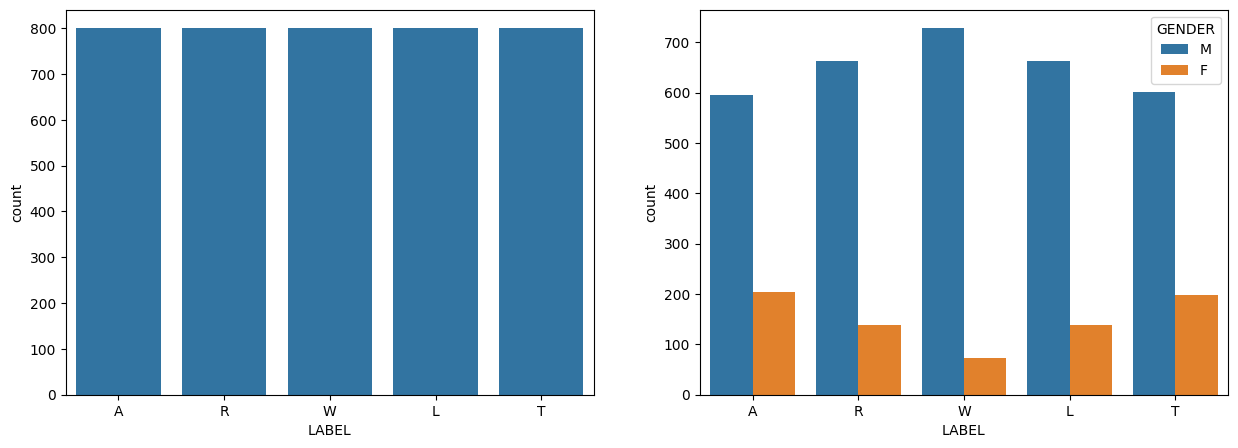

In [ ]:
#Checking data for class imbalance
#By balanced, we mean that the number of inputs for each class must be close to each other.
#Here we can see that the ‘GENDER’ column is not balanced, so we can drop that column.
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0], data = df, x = 'LABEL')
sns.countplot(ax=axes[1], data = df, x = 'LABEL', hue = 'GENDER')

In [ ]:
#Arch (A)
#Left Loop (L)
#Right Loop (R)
#Tented Arch (T)
#Whorl (W)

df['LABEL'].value_counts()

,count
LABEL,
A,800
R,800
W,800
L,800
T,800


In [ ]:
df.drop(columns = 'GENDER',inplace=True)
df.head()

,IMAGE PATH,IMAGE NAME,LABEL
0,dataset/s0418_02.png,s0418_02.png,A
1,dataset/s1328_01.png,s1328_01.png,R
2,dataset/f0493_01.png,f0493_01.png,W
3,dataset/f1884_03.png,f1884_03.png,W
4,dataset/f0729_04.png,f0729_04.png,A


In [ ]:
#Mapping the classes to an integer
#it is not possible for a neural network to learn using characters. It is important to map each of the class to an integer.
classes = list(np.unique(labels))
print(classes)
map_classes = dict(zip(classes, [t for t in range(len(classes))]))
print(map_classes)
df['MAPPED LABELS'] = [map_classes[i] for i in df['LABEL']]
df = df.sample(frac = 1)
df.to_csv('dataset.csv')
df.head()

['A', 'L', 'R', 'T', 'W']
{'A': 0, 'L': 1, 'R': 2, 'T': 3, 'W': 4}


,IMAGE PATH,IMAGE NAME,LABEL,MAPPED LABELS
1622,dataset/s0288_01.png,s0288_01.png,R,2
1241,dataset/s0001_01.png,s0001_01.png,W,4
2868,dataset/s0035_07.png,s0035_07.png,L,1
3562,dataset/f0014_06.png,f0014_06.png,W,4
2043,dataset/f0648_07.png,f0648_07.png,T,3


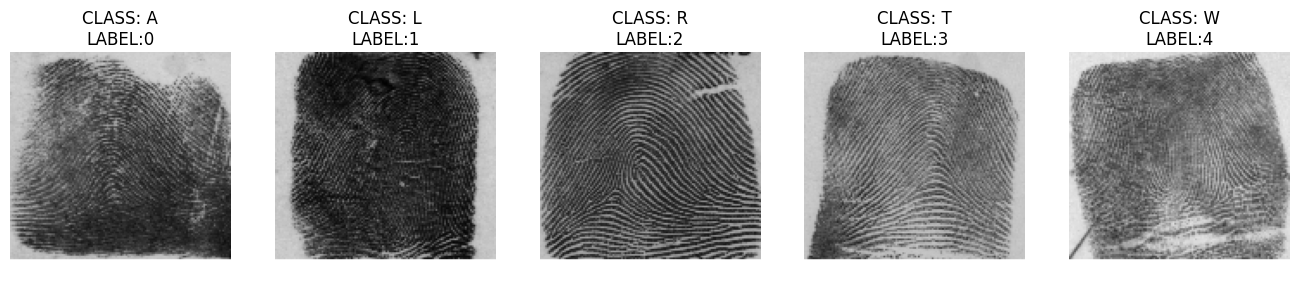

In [ ]:
#Plotting Images from each class
dim = len(classes)
fig,axes = plt.subplots(1,dim)
fig.subplots_adjust(0,0,2,2)
for idx, i in enumerate(classes):
    dum = df[df['LABEL'] == i]
    random_num = random.choice(dum.index)
    label = df.loc[random_num]['LABEL']
    axes[idx].imshow(cv2.imread(df.loc[random_num]['IMAGE PATH']))
    axes[idx].set_title("CLASS: "+label +"\n" +  "LABEL:"+str(map_classes[label]))
    axes[idx].axis('off')

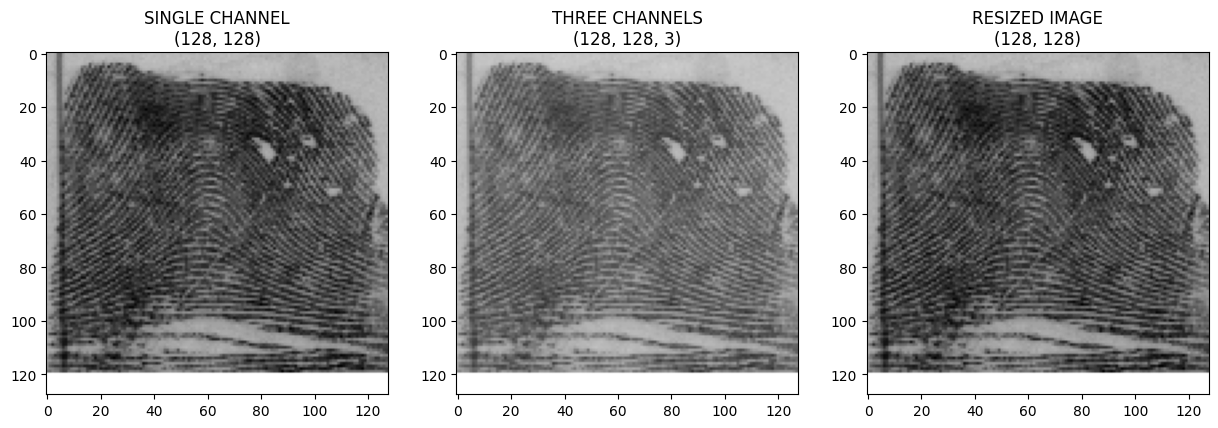

In [ ]:
# data preperation
random_number = random.randint(0,len(df))
img_path = df.loc[random_number]['IMAGE PATH']
gray_img = cv2.imread(img_path,0)
color_img = cv2.imread(img_path)
resized_img = cv2.resize(cv2.imread(img_path,0), (128,128)) #Resized Grayscale image

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('SINGLE CHANNEL\n'+ str(gray_img.shape))
axes[0].imshow(gray_img, cmap='gray')
axes[1].set_title('THREE CHANNELS\n'+ str(color_img.shape))
axes[1].imshow(color_img)
axes[2].set_title('RESIZED IMAGE\n'+ str(resized_img.shape))
axes[2].imshow(resized_img, cmap='gray')

In [ ]:
X_data = df['IMAGE PATH']
y_data = df['MAPPED LABELS']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, shuffle=True, test_size=0.01,stratify=y_data)
#Creating numpy arrays of images
X = []
y = []
for i in X_train:
    X.append(cv2.imread(i))
for i in y_train:
    y.append(i)
X = np.array(X)
y = np.array(y)
# Converting the labels vector to one-hot format
y = keras.utils.to_categorical(y, 5)

In [ ]:
print(f"Total number of Images: {len(X_data)}")
print(f"Number of Training Images: {len(X_train)}")
print(f"Number of Test Images: {len(X_test)}") # Saving a small number of images for model testing|
print(f"Shape of Images: {X[0].shape}") #Printing the shape of Images

Total number of Images: 4000
Number of Training Images: 3960
Number of Test Images: 40
Shape of Images: (128, 128, 3)


In [ ]:
#Training a sequential model
from keras import layers, regularizers
from keras.models import Sequential

model = Sequential(
    [
        layers.Conv2D(32, input_shape=(128,128,3), padding="same", kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="softmax", kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Hyperparameters
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
BATCH_SIZE = 64
EPOCHS = 20

In [ ]:
#Training
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['accuracy'])

history=model.fit(x=X, y=y, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.2024 - loss: 6.9293 - val_accuracy: 0.2045 - val_loss: 2.8637
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.2368 - loss: 2.8118 - val_accuracy: 0.2929 - val_loss: 2.6711
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.2881 - loss: 2.5875 - val_accuracy: 0.5303 - val_loss: 2.1804
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.4648 - loss: 2.2100 - val_accuracy: 0.5682 - val_loss: 1.8998
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5685 - loss: 1.8600 - val_accuracy: 0.6818 - val_loss: 1.5711
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6633 - loss: 1.5842 - val_accuracy: 0.7260 - val_loss: 1.3518
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7127 - loss: 1.3645 - val_accuracy: 0.7222 - val_loss: 1.2807
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7239 - loss: 1.2432 - val_accuracy: 0.7904 - val_

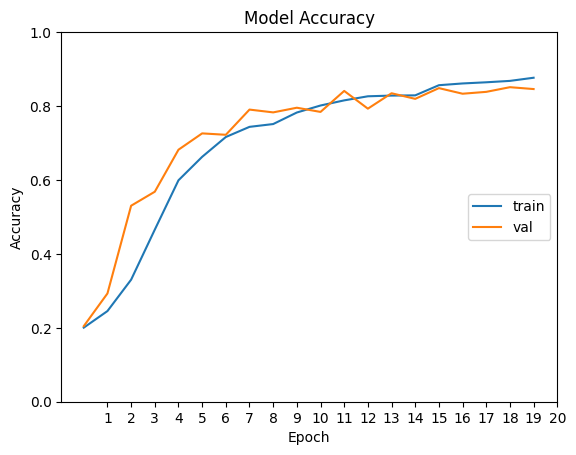

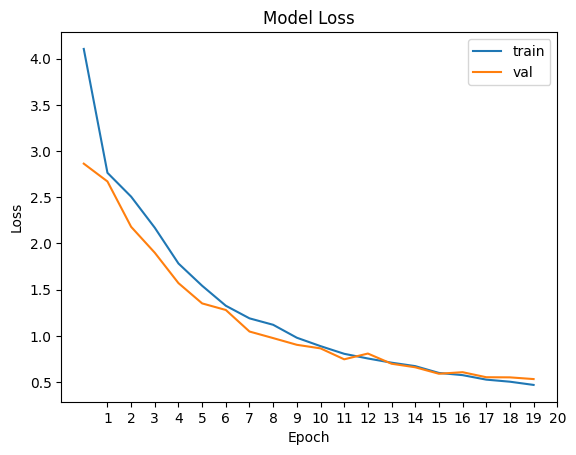

In [ ]:
# Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='center right')
plt.ylim(0, 1)  # Adjust y-axis range to display up to 1
plt.xticks(range(1, 21))  # Set x-axis ticks from 1 to 20
plt.show()


# Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.xticks(range(1, 21))  # Set x-axis ticks from 1 to 20
plt.show()



In [ ]:
test_X = []
for i in X_test:
    im = cv2.imread(i)
    im = np.reshape(im, (1,128,128,3))
    test_X.append(im)
test_X = np.array(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


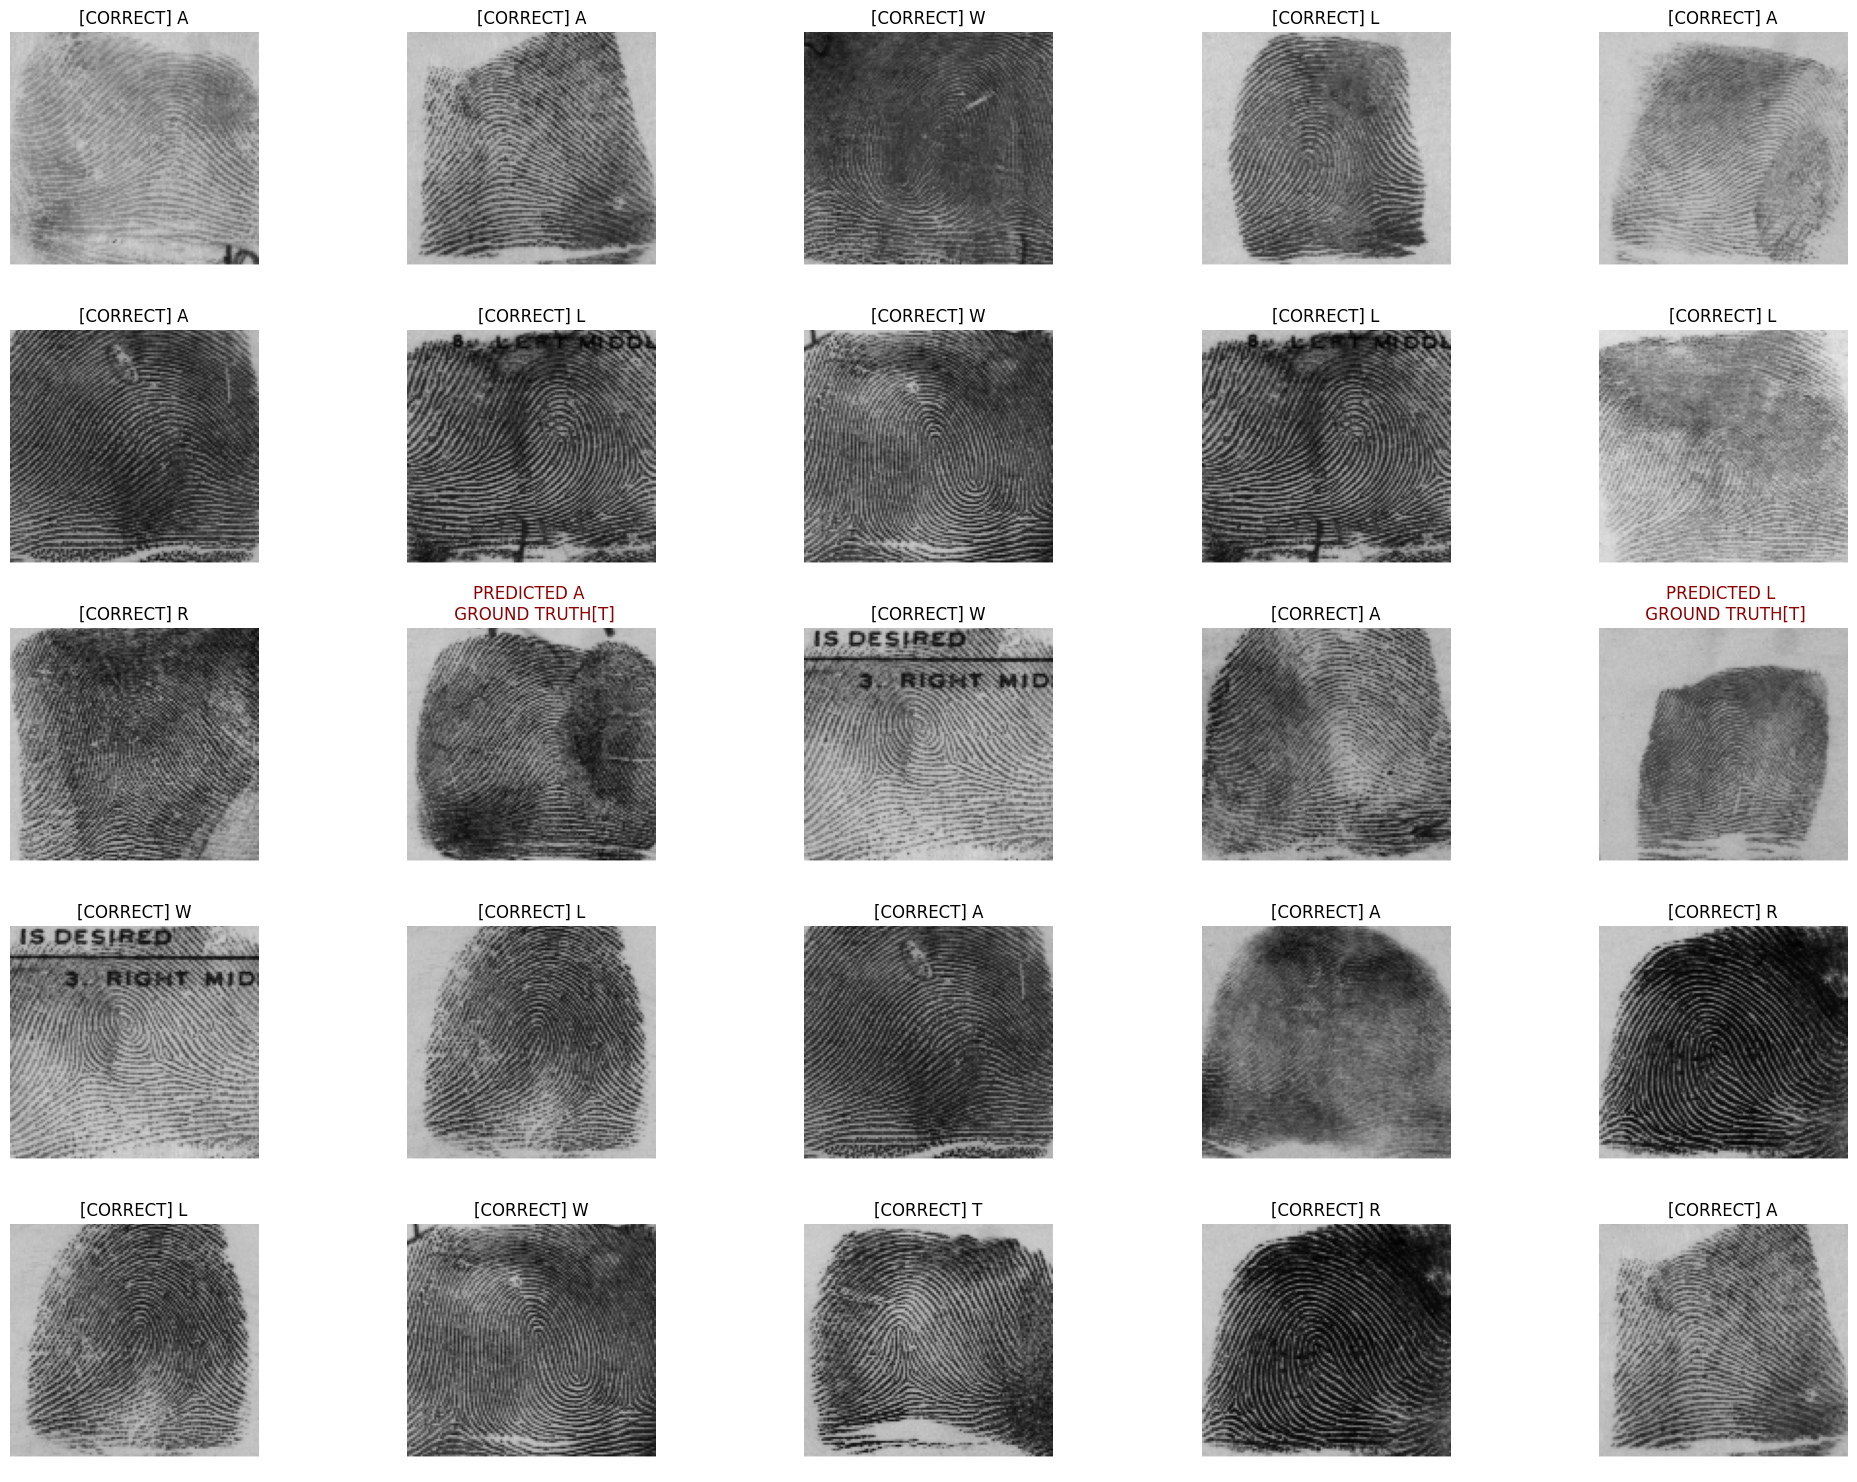

In [ ]:
#Plotting Predictions
fig,axes = plt.subplots(5,5)
fig.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        num = random.randint(0,len(test_X)-1)
        display_image = test_X[num].squeeze(0)
        image = test_X[num]
        predicted_prob = model.predict(image)
        predicted_class = np.argmax(predicted_prob)
        ground_truth =classes[y_test.iloc[num]]
        axes[i,j].imshow(display_image)
        axes[i,j].imshow(display_image)
        if(classes[predicted_class] != classes[y_test.iloc[num]]):
            t = 'PREDICTED {} \n GROUND TRUTH[{}]'.format(classes[predicted_class], classes[y_test.iloc[num]])
            axes[i,j].set_title(t, fontdict={'color': 'darkred'})
        else:
            t = '[CORRECT] {}'.format(classes[predicted_class])
            axes[i,j].set_title(t)
        axes[i,j].axis('off')